## INSTALLATION AND SETUP

In [1]:
#!pip install tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

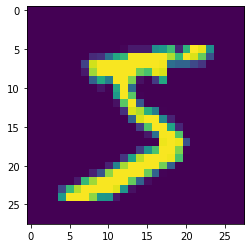

In [6]:
plt.imshow(x_train[0])

In [7]:
y_train[0]

5

In [8]:
# normalizing the images
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
# reshape the images into 3 dimensions
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [10]:
# defining an object
model = tf.keras.models.Sequential()

In [11]:
# Adding 1st CNN layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
# Adding 2nd CNN layer
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
# Adding maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# Adding dropout layer
model.add(tf.keras.layers.Dropout(0.4))
# Adding flatten layer
model.add(tf.keras.layers.Flatten())
# fully connected layer
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
# output layer
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [17]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["sparse_categorical_accuracy"])

In [18]:
history = model.fit(x_train,y_train,batch_size = 128, epochs = 10, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 13s 7ms/step - loss: 0.1655 - sparse_categorical_accuracy: 0.9505 - val_loss: 0.0474 - val_sparse_categorical_accuracy: 0.9823
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0504 - sparse_categorical_accuracy: 0.9844 - val_loss: 0.0343 - val_sparse_categorical_accuracy: 0.9889
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0367 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.0337 - val_sparse_categorical_accuracy: 0.9894
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0263 - sparse_categorical_accuracy: 0.9915 - val_loss: 0.0336 - val_sparse_categorical_accuracy: 0.9891
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0194 - sparse_categorical_accuracy: 0.9936 - val_loss: 0.0316 - val_sparse_categorical_accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0176 - sparse_categoric

In [19]:
# model predictions
predict_x=model.predict(x_test) 
y_pred=np.argmax(predict_x,axis=1)

In [21]:
y_pred[15],y_test[15]

(5, 5)

In [22]:
# confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 977    0    0    0    1    0    1    1    0    0]
 [   0 1128    0    2    0    1    2    2    0    0]
 [   1    0 1021    0    0    0    0   10    0    0]
 [   0    0    1 1003    0    3    0    1    1    1]
 [   0    0    0    0  976    0    1    0    0    5]
 [   1    0    0    6    0  884    1    0    0    0]
 [   3    2    0    0    7    4  938    0    3    1]
 [   0    0    4    0    0    0    0 1023    1    0]
 [   3    1    4    0    0    1    1    3  959    2]
 [   0    0    0    0    4    2    0    7    2  994]]


In [23]:
acc_cm = accuracy_score(y_test,y_pred)
print(acc_cm)

0.9903


In [28]:
 # Plotting the learning curve
 def learning_curve(history,epoch):
  # training vs validation accuracy
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()
  # training vs validation loss
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model Loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

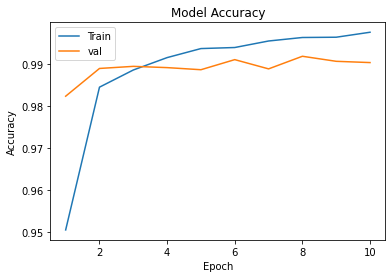

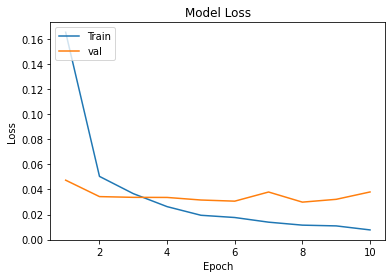

In [29]:
learning_curve(history,10)